Professional developers who love programming and are happy to contribute to open source projects are more likely to gain career satisfaction.However, the correlation between them is actually still relatively weak.

I wonder if the reverse is the same. In other words, I want to know if the talent market and the company are more favored for this segment of the people. This preference tends to be reflected in the salaries of developers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ProgramHobbyStats as phs
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

In [2]:
print("The total number of rows in data set is {}.".format(df.shape[0]))

# Check the column Salary for missing values.
print("The number of rows with invalid Salary is {}."
      .format(sum(df['Salary'].isnull())))

The total number of rows in data set is 51392.
The number of rows with invalid Salary is 38501.


In [3]:
df['Salary'].describe()

count     12891.000000
mean      56298.480641
std       39880.905277
min           0.000000
25%       26440.371839
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

In [4]:
# Discard rows with missing values.
# Because if we fill in the missing values with the median, 
# it will have a serious impact on the following analysis.
salary_df = df[df['Salary'].isnull()==False]
salary_df['Salary'].describe()

count     12891.000000
mean      56298.480641
std       39880.905277
min           0.000000
25%       26440.371839
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

In [5]:
dev_salary_df = salary_df[salary_df['Professional']=='Professional developer']
dev_salary_df['Salary'].describe()

count     12891.000000
mean      56298.480641
std       39880.905277
min           0.000000
25%       26440.371839
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

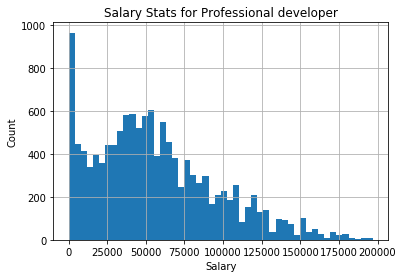

In [6]:
dev_salary_df['Salary'].hist(bins=50);
plt.title('Salary Stats for Professional developer');
plt.xlabel('Salary');
plt.ylabel('Count');

In [7]:
dev_salary_df[dev_salary_df['Salary']==0].shape[0]

6

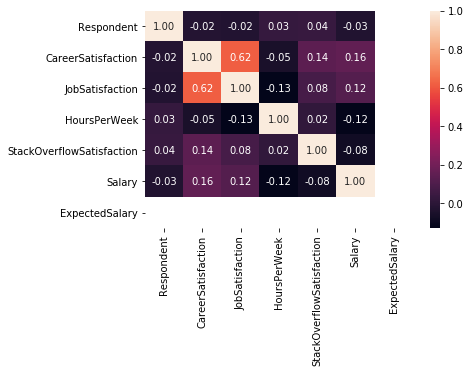

In [8]:
sns.heatmap(dev_salary_df.corr(), annot=True, fmt=".2f");

If we do not convert the value of column ProgramHobby, then this diagram has nothing to do with it at all.

In [9]:
dev_salary_hobby_df = phs.add_hobby_columns(dev_salary_df)
cols = ['YearsProgram', 'YearsCodedJob', 'JobSatisfaction', 'CareerSatisfaction', 'hobby', 'contrib', 'Salary']
sub_df = dev_salary_hobby_df[cols]

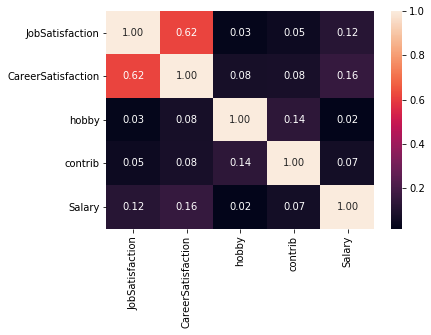

In [10]:
sns.heatmap(sub_df.corr(), annot=True, fmt=".2f");

We can see that, after the conversion of feature programhobby, there is a positive correlation between column hobby and contrib and several columns. But the relationship is not obvious. We previously thought that the correlation between column contrib and column Careersatisfaction was not small. However, judging from this heat map, the correlation is not obvious. In addition, there is a positive correlation between the column contrib and the column Salary, but it is also not obvious.

From the two diagrams below, we can see the distribution of some key feature values.

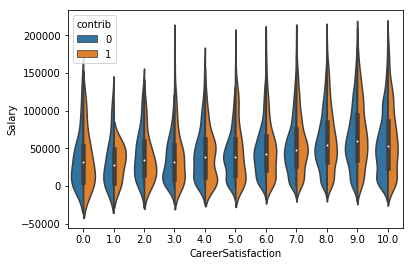

In [11]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.violinplot(x="CareerSatisfaction", y="Salary", hue="contrib", data=sub_df, split=True);

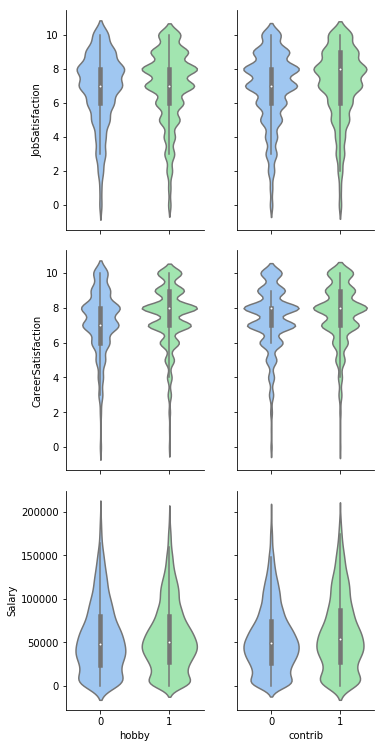

In [12]:
g = sns.PairGrid(sub_df,
                 x_vars=['hobby', 'contrib'],
                 y_vars=['JobSatisfaction', 'CareerSatisfaction', 'Salary'],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette='pastel');

The following diagram is intended to show the impact of different values of feature contrib on the correlation between Salary and CareerSatisfaction. Thus, the impact is small.

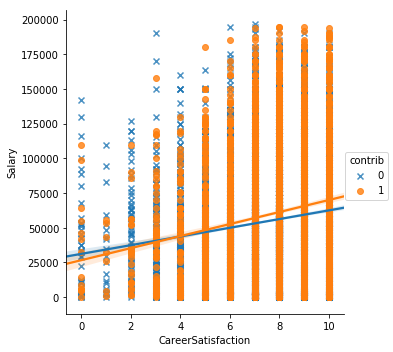

In [13]:
sns.lmplot(x="CareerSatisfaction", y="Salary", hue='contrib', data=sub_df,
           markers=["x", "o"]);

Here, we can draw a third conclusion, that is: Love programming is not so important for professional developers. This is true for both their careers and those of their employers. However, it is always useful to actively contribute to open source projects.
While a love of programming and contributions to open source projects, especially the latter, may make it easier for them to get satisfaction, there is not enough evidence that this will make them significantly more well paid. There is no significant correlation between programming hobby and salary.